In [33]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
import numpy as np

# Path to your training file in Drive
training_path = '/content/drive/MyDrive/deep_writing/deepwriting_training[1].npz'

# Load the dataset
data = np.load(training_path, allow_pickle=True)

# Check the contents
print("Available keys in .npz file:", data.files)
print("Shape of first sample stroke:", data['strokes'][0].shape)
print("Example text:", data['texts'][0])



Available keys in .npz file: ['subject_labels', 'eoc_labels', 'alphabet', 'strokes', 'eow_labels', 'char_labels', 'word_labels', 'max', 'min', 'soc_labels', 'mean', 'texts', 'std', 'preprocessing', 'sow_labels']
Shape of first sample stroke: (326, 3)
Example text: He smiled at his own


Sample 0 Text: He smiled at his own


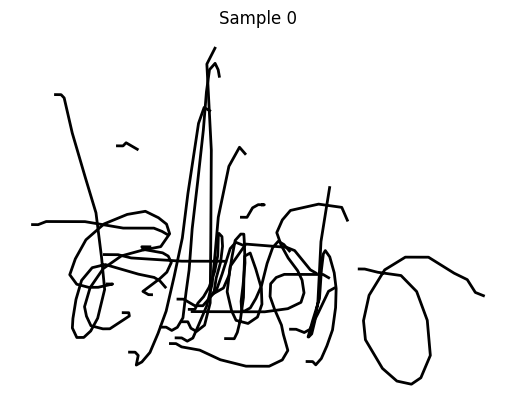

Sample 1 Text: actually dripping from his hands .


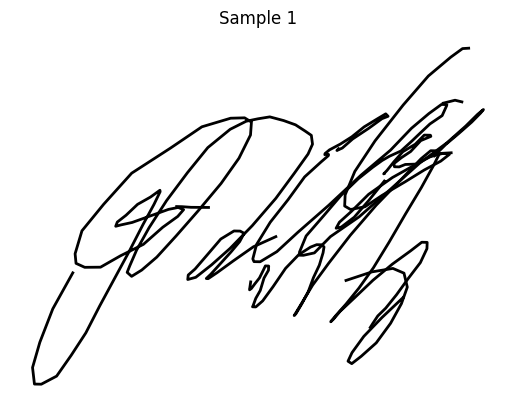

Sample 2 Text: problems. They will not work in


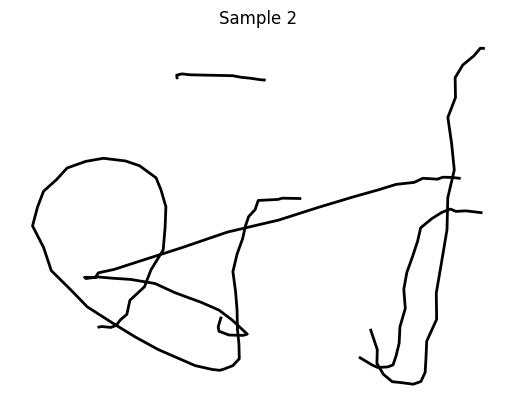

Sample 3 Text: conservatives have been content


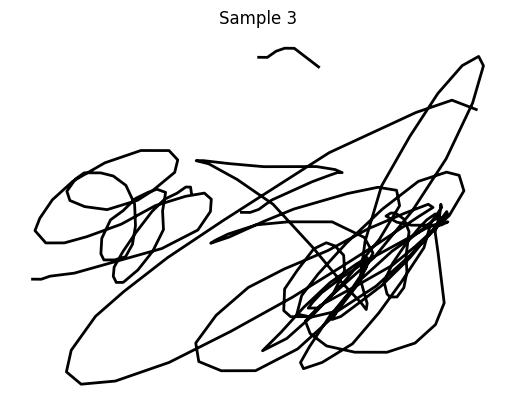

Sample 4 Text: Each section of the


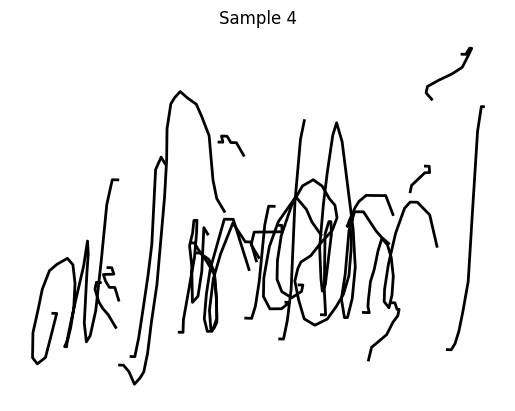

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_path ='/content/drive/MyDrive/deep_writing/deepwriting_training[1].npz'
data = np.load(data_path, allow_pickle=True)

strokes = data['strokes']
texts = data['texts']

def plot_stroke(sample, title="Handwriting"):
    x, y = 0, 0
    X, Y = [], []
    for i in range(len(sample)):
        dx, dy, pen = sample[i]
        x += dx
        y += dy
        X.append(x)
        Y.append(y)
        if pen == 1:  # Pen lifted
            plt.plot(X, Y, 'k-', linewidth=2)
            X, Y = [], []
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()

# Show first 5 stroke samples with text
for i in range(5):
    print(f"Sample {i} Text:", texts[i])
    plot_stroke(strokes[i], title=f"Sample {i}")


In [ ]:
'''
#first model cells
X_all = []
y_all = []

for seq in strokes:
    if len(seq) < 2:
        continue
    X_all.append(seq[:-1])   # All but last point
    y_all.append(seq[1:])    # All but first point (next step)

print("Total sequences:", len(X_all))
print("Shape of first X:", X_all[0].shape)
'''

Total sequences: 34577
Shape of first X: (325, 3)


In [ ]:
'''
#first model cells
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to the same length
max_len = 300  # max length of stroke sample
X_pad = pad_sequences(X_all, maxlen=max_len, dtype='float32', padding='post')
y_pad = pad_sequences(y_all, maxlen=max_len, dtype='float32', padding='post')

print("Padded X shape:", X_pad.shape)
print("Padded y shape:", y_pad.shape)
'''

Padded X shape: (34577, 300, 3)
Padded y shape: (34577, 300, 3)


In [ ]:
''''
#first model cells
#training and validaion sets
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_pad=np.array(X_pad)
y_pad=np.array(y_pad)
X_train,X_val,y_train,y_val=train_test_split(X_pad,y_pad,test_size=0.1,random_state=42)
print("train shape",X_train.shape,y_train.shape)
print("val shape:",X_val.shape,y_val.shape)
'''

train shape (31119, 300, 3) (31119, 300, 3)
val shape: (3458, 300, 3) (3458, 300, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,GRU,Dense,Masking

In [ ]:
'''
#first model cells
#input shape
input_seq=Input(shape=(None,3))
#masking
mask=Masking(mask_value=0.0)(input_seq)
#gru layer
gru=GRU(256,return_sequences=True)(mask)
#output
output=Dense(3)(gru)
#model
model=Model(inputs=input_seq,outputs=output)
model.compile(optimizer='adam',loss='mse')
model.summary()
'''

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, None, 3)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_2         │ (None, None, 3)   │          0 │ input_layer_5[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_5 (Masking) │ (None, None, 3)   │          0 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any_2 (Any)         │ (None, None)      │          0 │ not_equal_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_2 (GRU)         │ (None, None, 256) │    200,448 │ masking_5[0][0],  │
│                     │                   │            │ any_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, None, 3)   │        771 │ gru_2[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 201,219 (786.01 KB)

 Trainable params: 201,219 (786.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
# OLD RNN MODEL (non-text-aware)
# Keeping for reference — do not run this again
history=model.fit(X_train,y_train,
validation_data=(X_val,y_val),
batch_size=64,
epochs=30
)
'''

Epoch 1/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 678s 1s/step - loss: 0.4644 - val_loss: 0.3174
Epoch 2/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 723s 1s/step - loss: 0.3230 - val_loss: 0.2951
Epoch 3/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 846s 2s/step - loss: 0.3012 - val_loss: 0.2831
Epoch 4/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 867s 2s/step - loss: 0.2886 - val_loss: 0.2764
Epoch 5/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 863s 2s/step - loss: 0.2944 - val_loss: 0.2710
Epoch 6/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - loss: 0.2739 - val_loss: 0.2694
Epoch 7/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 818s 2s/step - loss: 0.2770 - val_loss: 0.2648
Epoch 8/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 818s 2s/step - loss: 0.2759 - val_loss: 0.2636
Epoch 9/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 865s 2s/step - loss: 0.2705 - val_loss: 0.2636
Epoch 10/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 864s 2s/step - loss: 0.2675 - val_loss: 0.2611
Epoch 11/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - loss: 0.2650 - val_loss: 0.2600
Epoch 12/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
'''
#first model cells
# Save model to Google Drive
model.save('/content/drive/MyDrive/deep_writing/handwriting_model.keras')
'''

In [2]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/deep_writing/handwriting_model.keras')
print("model loaded",model)

model loaded <Functional name=functional_2, built=True>


In [13]:
import numpy as np
from collections import defaultdict

# Load dataset
data = np.load('/content/drive/MyDrive/deep_writing/deepwriting_validation[1].npz', allow_pickle=True)
texts = data['texts']
strokes = data['strokes']
char_labels = data['char_labels']

# For first sample
index = 10
text = texts[index]
stroke_seq = strokes[index]
char_ids = char_labels[index]

# Create mapping from characters to strokes
char_to_strokes = defaultdict(list)
for i, cid in enumerate(char_ids):
    if cid < len(text):
        char_to_strokes[text[cid]].append(stroke_seq[i])

# Now print mapping
for ch, stroke_list in char_to_strokes.items():
    print(f"Character: {ch}, Num strokes: {len(stroke_list)}")




Character: T, Num strokes: 16
Character:  , Num strokes: 33


In [17]:
import numpy as np

def create_dataset(texts, char_labels, strokes, char_to_id, seq_len=50):
    X_char = []
    X_stroke = []
    Y = []

    for i in range(len(texts)):
        try:
            chars = texts[i]
            char_ids = [char_to_id[c] for c in chars if c in char_to_id]
            stroke_seq = strokes[i]
            label_seq = char_labels[i]

            # Skip samples that are too short
            if len(stroke_seq) < seq_len + 1:
                continue

            for j in range(seq_len, len(stroke_seq) - 1):
                stroke_window = stroke_seq[j-seq_len:j]

                # Safely map stroke indices to char IDs
                char_window = []
                for k in range(j-seq_len, j):
                    idx = label_seq[k]
                    if idx < len(char_ids):  # ✅ check to avoid crash
                        char_window.append(char_ids[idx])
                    else:
                        break  # corrupted — skip this window

                if len(char_window) < seq_len:
                    continue  # skip incomplete sequence

                X_char.append(char_window)
                X_stroke.append(stroke_window)
                Y.append(stroke_seq[j])  # target: next stroke

        except Exception as e:
            # Skip any weird sample
            print(f"Skipping sample {i} due to error: {e}")
            continue

    return np.array(X_char), np.array(X_stroke), np.array(Y)




In [21]:
#building model C-RNN
from tensorflow.keras import layers, models

def build_char_stroke_model(char_vocab_size, char_embed_dim=32, rnn_units=128):
    # Inputs
    char_input = layers.Input(shape=(None,), name="char_input")           # (batch, seq)
    stroke_input = layers.Input(shape=(None, 3), name="stroke_input")     # (batch, seq, 3)

    # Embedding for characters
    x_char = layers.Embedding(input_dim=char_vocab_size, output_dim=char_embed_dim)(char_input)

    # Combine char embeddings + strokes
    x = layers.Concatenate(axis=-1)([x_char, stroke_input])

    # RNN layer — predict 1 step only (not sequence)
    x = layers.GRU(rnn_units)(x)  #  fixed: only last output

    # Output: next (dx, dy, pen_state)
    output = layers.Dense(3)(x)

    # Model
    model = models.Model(inputs=[char_input, stroke_input], outputs=output)
    model.compile(optimizer='adam', loss='mse')

    return model



In [22]:
model = build_char_stroke_model(char_vocab_size=vocab_size)
model.fit([X_char, X_stroke], Y, batch_size=64, epochs=15)


Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 0.6328
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.5406
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.4499
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.4870
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.5416
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.3680
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.3159
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - loss: 0.2981
Epoch 9/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.2296
Epoch 10/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.2671
Epoch 11/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.2625
Epoch 12/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.2276
Epoch 13/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.2215
Epoch 14/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 0.1828
Epoch 15/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.263

In [31]:
import matplotlib.pyplot as plt

# Utility to plot strokes
def plot_strokes(stroke_seq, title="Generated Handwriting"):
    fig, ax = plt.subplots(figsize=(10, 2))
    x, y = 0, 0
    x_seq, y_seq = [], []

    for i, (dx, dy, pen_down) in enumerate(stroke_seq):
        x += dx
        y += dy
        x_seq.append(x)
        y_seq.append(y)

        if pen_down > 0.5 or i == len(stroke_seq)-1:
            if len(x_seq) > 1:
                ax.plot(x_seq, y_seq, 'k', linewidth=2)
            x_seq, y_seq = [], []

    ax.axis('off')
    plt.title(title)
    plt.show()

generated = generate_handwriting(text, model, char_to_id)
print("Sample of generated strokes:", generated[:5])


# Function to prepare input and predict strokes
def generate_handwriting(text, model, char_to_id, seq_len=50):
    # Convert characters to IDs
    char_ids = [char_to_id.get(c, 0) for c in text]
    strokes = [[0, 0, 1]] * seq_len  # Start with blank strokes

    generated_strokes = []

    for i in range(len(char_ids)):
        # Prepare input for character IDs
        char_input = np.array([char_ids[max(0, i - seq_len):i+1]])
        char_input = np.pad(char_input, ((0, 0), (seq_len - char_input.shape[1], 0)), mode='constant')

        # Prepare stroke input
        stroke_input = np.array([strokes[-seq_len:]])

        # Predict
        pred = model.predict([char_input, stroke_input], verbose=0)
        dx, dy, pen = pred[0]

        # Force pen to be either 1 (pen-up) or 0 (pen-down) for clear drawing
        pen = 1.0 if pen > 0.5 else 0.0

        generated_strokes.append([dx, dy, pen])
        strokes.append([dx, dy, pen])

    return np.array(generated_strokes)



Sample of generated strokes: [[ 5.68753338e+00 -1.82102704e+00 -2.00423062e-01]
 [-1.20302737e+00  4.36200172e-01 -1.23666085e-01]
 [-1.78785622e+00  6.55538201e-01 -9.52259675e-02]
 [-8.22358251e-01  1.01291716e+00 -7.71394074e-02]
 [-1.12240016e+00  1.15106881e+00  4.98442911e-03]]


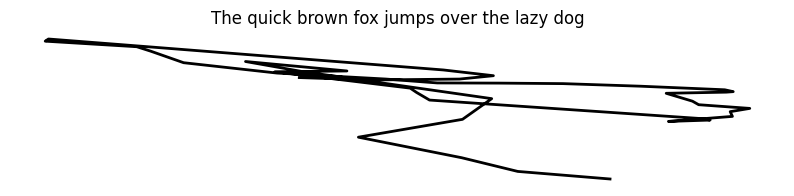

In [32]:
text = "The quick brown fox jumps over the lazy dog"
generated = generate_handwriting(text, model, char_to_id)
plot_strokes(generated, title=text)
